In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inp=int(input())
out=int(input())
train_pattern=int(input())
test_pattern=int(input())

7
1
4008
1200


# Data Reading from File

In [3]:
df_train=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [672]:
df_train.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,1,1
4,0,79.0,1,0,174.12,24.0,0,1
5,1,81.0,0,0,186.21,29.0,1,1


# Data Cleaning to remove unnecessary Object Rows

In [5]:
df_train.drop(['id'],axis=1,inplace=True)

In [6]:
df_train.drop(['ever_married','work_type','Residence_type'],axis=1,inplace=True)

In [10]:
def gender(n):
    if n=='Male':
        return 1
        
    else:
        return 0

In [11]:
df_train['gender']=df_train['gender'].apply(gender)

In [15]:
def smoke(n):
    if n=='formerly smoked' or n=='smokes':
        return 1
    else:
        return 0

In [16]:
df_train['smoking_status']=df_train['smoking_status'].apply(smoke)

In [17]:
df_train.dropna(axis=0,inplace=True)

In [384]:
df_train

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,1,1
4,0,79.0,1,0,174.12,24.0,0,1
5,1,81.0,0,0,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...
4179,0,13.0,0,0,103.08,18.6,0,0
4181,0,81.0,0,0,125.20,40.0,0,0
4182,0,35.0,0,0,82.99,30.6,0,0
4183,1,51.0,0,0,166.29,25.6,1,0


# Splitting the data set into Training Input and Output

In [494]:
df_train2=df_train[['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status']]

In [495]:
df_train_out2=df_train['stroke']

In [496]:
df_train2

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,228.69,36.6,1
2,1,80.0,0,1,105.92,32.5,0
3,0,49.0,0,0,171.23,34.4,1
4,0,79.0,1,0,174.12,24.0,0
5,1,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...
4179,0,13.0,0,0,103.08,18.6,0
4181,0,81.0,0,0,125.20,40.0,0
4182,0,35.0,0,0,82.99,30.6,0
4183,1,51.0,0,0,166.29,25.6,1


In [497]:
df_train_out2

0       1
2       1
3       1
4       1
5       1
       ..
4179    0
4181    0
4182    0
4183    0
4184    0
Name: stroke, Length: 4008, dtype: int64

# Normalising the data columns
### Here a number of columns like of glucose level,bmi and age are normalised

In [83]:
def min_max(x):
    l=[]
    a=min(x)
    b=max(x)
    for i in x:
        xnew=(i-a)/(b-a)
        l.append(xnew)
    return l
        

In [503]:
df_train2['Age']=min_max(df_train2['age'])
df_train2['Avg_Glucose_Level']=min_max(df_train2['avg_glucose_level'])
df_train2['Bmi']=min_max(df_train2['bmi'])

In [506]:
df_train2.drop(['age','avg_glucose_level','bmi'],axis=1,inplace=True)

In [508]:
df_train2['new']=np.arange(0,4008,1)
df_train2=df_train2.set_index('new')

In [509]:
df_train2

,gender,hypertension,heart_disease,smoking_status,Age,Avg_Glucose_Level,Bmi
new,,,,,,,
0,1,0,1,1,0.816895,0.801265,0.301260
1,1,0,1,0,0.975586,0.234512,0.254296
2,0,0,0,1,0.597168,0.536008,0.276060
3,0,1,0,0,0.963379,0.549349,0.156930
4,1,0,0,1,0.987793,0.605161,0.214204
...,...,...,...,...,...,...,...
4003,0,0,0,0,0.157715,0.221402,0.095074
4004,0,0,0,0,0.987793,0.323516,0.340206
4005,0,0,0,0,0.426270,0.128658,0.232532


# Now assigning weights to the Neural Network in Random Order

In [477]:
def weight_matrix(n_neurons):
    n_inp=n_neurons[0]
    n_hidden=n_neurons[1]
    n_out=n_neurons[2]
    V = np.random.randn(n_hidden,n_inp)
    b1 = np.random.rand(n_hidden)
    W = np.random.randn(n_out,n_hidden)
    b2 = np.zeros(n_out)
    return V,b1,W,b2

# Fordward Propagation

In [664]:
# Fordward Propagation function:

def fordward_prop(X,V,Bi_1,W,Bi_2):
    # for first layer 
    M=1/(1+np.exp(-((X.dot(V.T)))))
    #for second layer
    N=1/(1+np.exp(-((M.dot(W.T))+Bi_2)))


    return N,M

In [176]:
# output from first neural network layer 
print(yy)

             0         1         2
0     0.919531  0.967806  0.891075
2     0.919312  0.936880  0.779118
3     0.770048  0.891501  0.774338
4     0.901513  0.939107  0.723841
5     0.876060  0.961681  0.817320
...        ...       ...       ...
4179  0.658223  0.763843  0.587083
4181  0.817384  0.878247  0.650141
4182  0.714569  0.795722  0.598963
4183  0.830201  0.946898  0.799002
4184  0.734176  0.801247  0.601372

[4008 rows x 3 columns]


In [179]:
new_hidden_out1=yy[0]

In [ ]:
square_error=[]
for item,new in err:
    error=0.5*(item-new)**2
    square_error.append(error)
    
print(square_error)

In [138]:
zz=df_train['stroke']

In [153]:
zz=np.array(xx)
tt=np.array(df_train['stroke'])

# MSE Error Calculation before back propagation algorithm

In [385]:
square_error=[]
for i in range(4008):
    error=0.5*((zz[i]-tt[i])**2)
    square_error.append(error)

square_error=np.concatenate(square_error,axis=0)
print(square_error.T)
print('The average Mean Square Error for all pattern is given by :',sum(square_error)/len(square_error))

[0.02473227 0.02672389 0.02823102 ... 0.27661948 0.29523279 0.27736055]
The average Mean Square Error for all pattern is given by : 0.27111193743519946


# Back Propogation by differentiating the parameters

In [556]:
def diff_W1(W,Z,t,learning_rate):
    for j in range(0,len(W[0])):
        new1=0
        for i in range(0,len(Z)):
            new1+=(Z[0][i]-t[i])*Z[0][i]
        new1=(new1)/(4008)
        W[0][j]=W[0][j]-(learning_rate)*new1
        
    return W

In [467]:
# output from the hidden neuron
new_hidden_out

,0,1,2
new,,,
0,1.979923,2.618084,1.902095
1,1.976959,1.912342,1.060863
2,0.752511,1.320989,1.033299
3,1.758081,1.950629,0.763922
4,1.499564,2.437557,1.298622
...,...,...,...
4003,0.199316,0.388688,0.152247
4004,1.042654,1.190761,0.419985
4005,0.461607,0.574593,0.201473


In [586]:
def diff_V(V,Z,t,new_hidden_out,W,n):
    for i in range(0,len(V[0])):
        
        new1=0
        for j in range(0,len(W[0])):
            for k in range(0,len(Z)):
                new1+=(Z[0][k]-t[k])*W[0][j]*(new_hidden_out[j][k])*(1-new_hidden_out[j][k])
        new=(new1)/len(Z)
        V[0][i]=V[0][i]-(n)*new
    return V

In [389]:
new_hidden_out

,0,1,2
new,,,
0,1.979923,2.618084,1.902095
1,1.976959,1.912342,1.060863
2,0.752511,1.320989,1.033299
3,1.758081,1.950629,0.763922
4,1.499564,2.437557,1.298622
...,...,...,...
4003,0.199316,0.388688,0.152247
4004,1.042654,1.190761,0.419985
4005,0.461607,0.574593,0.201473


In [339]:
new_hidden_out['new']=np.arange(0,4008,1)

In [341]:
new_hidden_out=new_hidden_out.set_index('new')

In [203]:
new_hidden_out2=new_hidden_out[1]
new_hidden_out3=new_hidden_out[2]

In [229]:
new_hidden_out1=np.array(new_hidden_out1)
new_hidden_out2=np.array(new_hidden_out2)
new_hidden_out3=np.array(new_hidden_out3)




# Defining the error function

In [714]:
def define(zz,tt):
    error=0
    for i in range(len(tt)):
        error+=(0.5*((zz[i][0]-tt[i])**2))/len(tt)
        
    return error

# Running Code

0 epoch ---> rmse_error : 0.07390278317712641
1 epoch ---> rmse_error : 0.0888772825021353
2 epoch ---> rmse_error : 0.08823101014505369
3 epoch ---> rmse_error : 0.08760542049421081
4 epoch ---> rmse_error : 0.08699962061043774
5 epoch ---> rmse_error : 0.08641276673627887
6 epoch ---> rmse_error : 0.08584406106224753
7 epoch ---> rmse_error : 0.08529274873388501
8 epoch ---> rmse_error : 0.08475811507999251
9 epoch ---> rmse_error : 0.08423948304407418
10 epoch ---> rmse_error : 0.0837362108025647
11 epoch ---> rmse_error : 0.08324768955483325
12 epoch ---> rmse_error : 0.08277334147124041
13 epoch ---> rmse_error : 0.08231261778672075
14 epoch ---> rmse_error : 0.08186499702843512
15 epoch ---> rmse_error : 0.08142998336702745
16 epoch ---> rmse_error : 0.08100710508191288
17 epoch ---> rmse_error : 0.08059591313183934
18 epoch ---> rmse_error : 0.08019597982270894
19 epoch ---> rmse_error : 0.07980689756531252
20 epoch ---> rmse_error : 0.07942827771624579
21 epoch ---> rmse_error 

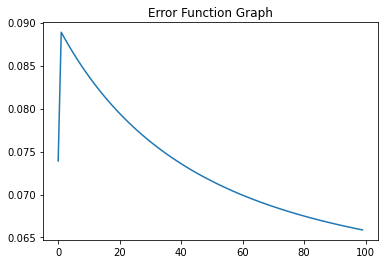

learning rate = 0.01 & no. of hidden neurons = 3 RMSE : 0.06588209410798668


In [656]:
n_inputs=7
n_hidden=3
n_output=1
epochs=100
n_neurons=[n_inputs,n_hidden,n_output]
weights=weight_matrix(n_neurons)
learning_rate=0.1
err=[]
for epoch in range(epochs):

    x=df_train2
    y=df_train_out4
    new_parameters={'V':weights[0],'b1':weights[1],'W':weights[2],'b2':weights[3]}
    fordward=fordward_prop(x,weights[0],weights[1],weights[2],weights[3])
    new=define(fordward[0],output)
    W=diff_W1(weights[2],fordward[0],y,learning_rate)
    V=diff_V(weights[0],fordward[0],y,fordward[1],weights[2],learning_rate)
    weights=[V,Bi_1,W,Bi_2]
    rsme=((new)/7)**0.5
    err.append(rsme)
    print('{} epoch ---> rmse_error : {}'.format(epoch,rsme,n_hidden))            
plt.figure()
plt.plot(np.arange(100),err)
plt.title('Error Function Graph')
plt.show()
print('learning rate = 0.01 & no. of hidden neurons = '+str(n_hidden) + ' RMSE : '+ str(err[-1]));



    

# Optimising the number of Hidden Neurons
### We are taking different numbers of neurons here to get to the results

0 epoch ---> rmse_error : 0.137852920943547
10 epoch ---> rmse_error : 0.12868720298443195
20 epoch ---> rmse_error : 0.1051500797343622
30 epoch ---> rmse_error : 0.09153207384126191
40 epoch ---> rmse_error : 0.08319694720485556
50 epoch ---> rmse_error : 0.07780430783309314
60 epoch ---> rmse_error : 0.07413611460868914
70 epoch ---> rmse_error : 0.07153041207237883
80 epoch ---> rmse_error : 0.06961015361555858
90 epoch ---> rmse_error : 0.06815051199835186
100 epoch ---> rmse_error : 0.06701163814727151
110 epoch ---> rmse_error : 0.06610317361251813
120 epoch ---> rmse_error : 0.0653647326343285
130 epoch ---> rmse_error : 0.06475473568417946
140 epoch ---> rmse_error : 0.06424378389672036
150 epoch ---> rmse_error : 0.0638105955286049
160 epoch ---> rmse_error : 0.06343943815322585
170 epoch ---> rmse_error : 0.0631184616233035
180 epoch ---> rmse_error : 0.0628385889821525
190 epoch ---> rmse_error : 0.06259276193461054


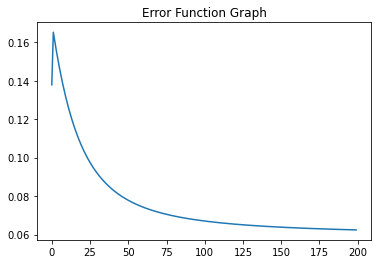

learning rate = 0.01 & no. of hidden neurons = 5 RMSE : 0.06239600375331841
0 epoch ---> rmse_error : 0.11893683272613575
10 epoch ---> rmse_error : 0.1051211785451859
20 epoch ---> rmse_error : 0.08799297895805615
30 epoch ---> rmse_error : 0.07956436812965699
40 epoch ---> rmse_error : 0.07470146157961013
50 epoch ---> rmse_error : 0.071597315308689
60 epoch ---> rmse_error : 0.06947321162955447
70 epoch ---> rmse_error : 0.06794424811103822
80 epoch ---> rmse_error : 0.06680051805107082
90 epoch ---> rmse_error : 0.06591873957656345
100 epoch ---> rmse_error : 0.06522218602812936
110 epoch ---> rmse_error : 0.06466082969100465
120 epoch ---> rmse_error : 0.06420078220280143
130 epoch ---> rmse_error : 0.06381834565028263
140 epoch ---> rmse_error : 0.0634964962551991
150 epoch ---> rmse_error : 0.06322271971808473
160 epoch ---> rmse_error : 0.06298763143690286
170 epoch ---> rmse_error : 0.06278407011089066
180 epoch ---> rmse_error : 0.06260648644244195
190 epoch ---> rmse_error :

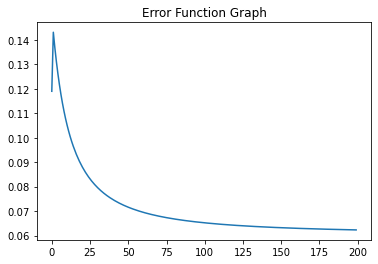

learning rate = 0.01 & no. of hidden neurons = 8 RMSE : 0.06232575641668496
0 epoch ---> rmse_error : 0.06478995715092321
10 epoch ---> rmse_error : 0.06949237086354201
20 epoch ---> rmse_error : 0.0673913531790508
30 epoch ---> rmse_error : 0.06599897115357752
40 epoch ---> rmse_error : 0.06501769627702866
50 epoch ---> rmse_error : 0.06429415036862259
60 epoch ---> rmse_error : 0.06374179943844137
70 epoch ---> rmse_error : 0.06330838576953063
80 epoch ---> rmse_error : 0.06296062498400339
90 epoch ---> rmse_error : 0.06267638800250433
100 epoch ---> rmse_error : 0.062440432880979425
110 epoch ---> rmse_error : 0.062241945284907674
120 epoch ---> rmse_error : 0.06207305605290107
130 epoch ---> rmse_error : 0.06192791306961312
140 epoch ---> rmse_error : 0.061802080922771216
150 epoch ---> rmse_error : 0.06169214143414909
160 epoch ---> rmse_error : 0.06159542117429121
170 epoch ---> rmse_error : 0.06150980147218232
180 epoch ---> rmse_error : 0.06143358333000805
190 epoch ---> rmse_e

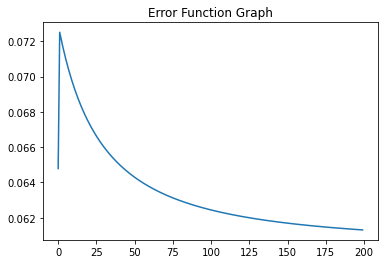

learning rate = 0.01 & no. of hidden neurons = 13 RMSE : 0.061309940608682
0 epoch ---> rmse_error : 0.20357167561975997
10 epoch ---> rmse_error : 0.10702810147272535
20 epoch ---> rmse_error : 0.08124769133000495
30 epoch ---> rmse_error : 0.07221724261473852
40 epoch ---> rmse_error : 0.06785587456170283
50 epoch ---> rmse_error : 0.06536923034005024
60 epoch ---> rmse_error : 0.06380016906026172
70 epoch ---> rmse_error : 0.06273988274962482
80 epoch ---> rmse_error : 0.06198708832589613
90 epoch ---> rmse_error : 0.06143226505698687
100 epoch ---> rmse_error : 0.06101121350946473
110 epoch ---> rmse_error : 0.060684063036655814
120 epoch ---> rmse_error : 0.06042488521983621
130 epoch ---> rmse_error : 0.060216174600930004
140 epoch ---> rmse_error : 0.06004574016971495
150 epoch ---> rmse_error : 0.0599048678137415
160 epoch ---> rmse_error : 0.05978718883201766
170 epoch ---> rmse_error : 0.05968795856888016
180 epoch ---> rmse_error : 0.059603582576371765
190 epoch ---> rmse_er

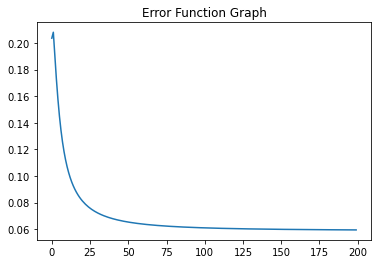

learning rate = 0.01 & no. of hidden neurons = 15 RMSE : 0.05947478841723176


In [668]:
hidden=[5,8,13,15]
n_epochs=200
learning_rate=0.1

for n_hidden in hidden:
    n_neurons=[n_inputs,n_hidden,n_outputs]
    weights=weight_matrix(n_neurons)
    err=[]
    for epoch in range(n_epochs):
        error=0
        x=df_train2
        y=df_train_out4
        new_parameters={'V':weights[0],'b1':weights[1],'W':weights[2],'b2':weights[3]}
        fordward=fordward_prop(x,weights[0],weights[1],weights[2],weights[3])
        new=define(fordward[0],output)
        W=diff_W1(weights[2],fordward[0],y,learning_rate)
        V=diff_V(weights[0],fordward[0],y,fordward[1],weights[2],learning_rate)
        weights=[V,Bi_1,W,Bi_2]
        rsme=((new)/7)**0.5
        err.append(rsme)
        if (epoch%10==0):
            print('{} epoch ---> rmse_error : {}'.format(epoch,rsme,n_hidden))            
    plt.figure()
    plt.plot(np.arange(200),err)
    plt.title('Error Function Graph')
    plt.show()
    print('learning rate = 0.01 & no. of hidden neurons = '+str(n_hidden) + ' RMSE : '+ str(err[-1]));
        
                  
            
       

In [ ]:
#Optimising the Learning Rate:

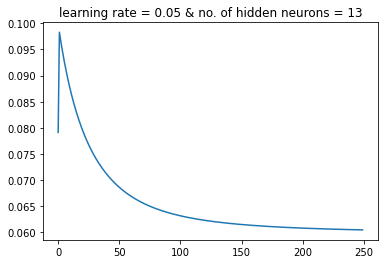

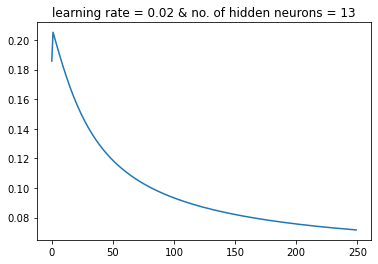

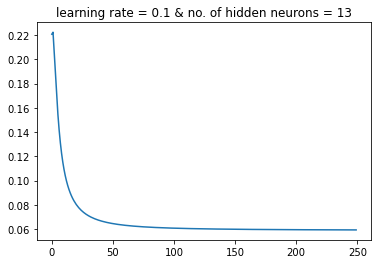

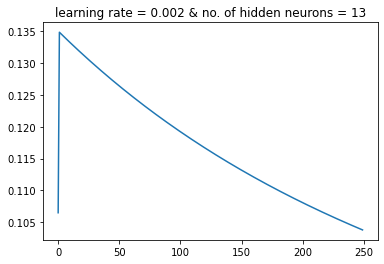

In [670]:
learn=[0.05,0.02,0.1,0.002]
n_epochs=250
n_hidden=13
for item in learn:
    n_neurons=[n_inputs,n_hidden,n_outputs]
    weights=weight_matrix(n_neurons)
    err=[]
    for epoch in range(n_epochs):
        error=0
        x=df_train2
        y=df_train_out4
        new_parameters={'V':weights[0],'b1':weights[1],'W':weights[2],'b2':weights[3]}
        fordward=fordward_prop(x,weights[0],weights[1],weights[2],weights[3])
        new=define(fordward[0],output)
        W=diff_W1(weights[2],fordward[0],y,item)
        V=diff_V(weights[0],fordward[0],y,fordward[1],weights[2],item)
        weights=[V,Bi_1,W,Bi_2]
        rsme=((new)/7)**0.5
        err.append(rsme)
                   
    plt.figure()
    plt.plot(np.arange(250),err)
    plt.title('learning rate = '+str(item)+' & no. of hidden neurons = 13')
    plt.show()


# Final Model for Calssification:

0 epoch ---> rmse_error : 0.2561011942867147
10 epoch ---> rmse_error : 0.22183382620814263
20 epoch ---> rmse_error : 0.1480041618757513
30 epoch ---> rmse_error : 0.11129815283309326
40 epoch ---> rmse_error : 0.09398428538403068
50 epoch ---> rmse_error : 0.08443159147703196
60 epoch ---> rmse_error : 0.07853236699270097
70 epoch ---> rmse_error : 0.07459581068873557
80 epoch ---> rmse_error : 0.07181820040061418
90 epoch ---> rmse_error : 0.06977423104946177
100 epoch ---> rmse_error : 0.06821999337560007
110 epoch ---> rmse_error : 0.06700664767331771
120 epoch ---> rmse_error : 0.06603877538911464
130 epoch ---> rmse_error : 0.06525269659124991
140 epoch ---> rmse_error : 0.06460446817512
150 epoch ---> rmse_error : 0.06406289713836374
160 epoch ---> rmse_error : 0.06360529775266578
170 epoch ---> rmse_error : 0.06321482054561443
180 epoch ---> rmse_error : 0.06287871774427628
190 epoch ---> rmse_error : 0.0625871859766488
200 epoch ---> rmse_error : 0.0623325755727979
210 epoch 

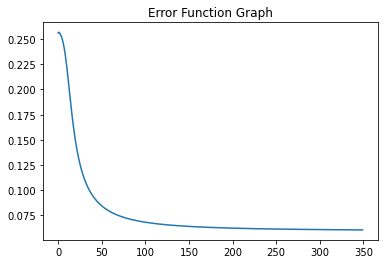

learning rate = 0.05 & no. of hidden neurons = 13 RMSE : 0.06059028024302728


In [671]:
n_inputs=7
n_hidden=13
n_output=1
epochs=350
n_neurons=[n_inputs,n_hidden,n_output]
weights=weight_matrix(n_neurons)
learning_rate=0.05
err=[]
for epoch in range(epochs):

    x=df_train2
    y=df_train_out4
    new_parameters={'V':weights[0],'b1':weights[1],'W':weights[2],'b2':weights[3]}
    fordward=fordward_prop(x,weights[0],weights[1],weights[2],weights[3])
    new=define(fordward[0],output)
    W=diff_W1(weights[2],fordward[0],y,learning_rate)
    V=diff_V(weights[0],fordward[0],y,fordward[1],weights[2],learning_rate)
    weights=[V,Bi_1,W,Bi_2]
    rsme=((new)/7)**0.5
    err.append(rsme)
    if (epoch%10==0):
        print('{} epoch ---> rmse_error : {}'.format(epoch,rsme,n_hidden))            
plt.figure()
plt.plot(np.arange(350),err)
plt.title('Error Function Graph')
plt.show()
print('learning rate = 0.05 & no. of hidden neurons = '+str(n_hidden) + ' RMSE : '+ str(err[-1]));

In [673]:
# the final parameters are stored in the weights 
print(weights)

[array([[ 3.58466860e+00,  1.88025376e+00, -7.15500190e-01,
        -6.86883781e-01,  1.11744024e+00,  1.18283897e+00,
         1.18445801e+00],
       [-2.54955794e-01, -1.25454260e-01,  3.27879524e-01,
         8.58930063e-02, -2.21930037e+00, -2.29799631e-01,
        -8.51406434e-01],
       [ 1.75211419e-01,  2.98525900e+00,  3.67481665e-01,
        -3.13529686e-01,  9.21801502e-01,  4.82687887e-01,
         4.20094490e-01],
       [ 6.06850593e-01,  2.05654356e+00, -1.13088844e+00,
         4.73632077e-01, -9.26381130e-01,  5.55512646e-01,
        -9.18686511e-01],
       [-4.17366814e-01, -2.95089914e-01,  9.75816719e-01,
         9.18454444e-01, -1.24571738e+00,  5.49341110e-02,
        -7.09579855e-01],
       [-1.25850491e+00, -2.17017050e-01, -3.08482788e-01,
         2.42671649e+00,  4.32959825e-01, -1.37761750e+00,
        -5.64774004e-01],
       [ 1.02138330e+00,  2.08844277e+00, -1.58598331e+00,
        -1.87992439e+00,  1.87096518e+00,  3.89614177e-01,
        -8.682927

# The Prediction model and results:




In [718]:
V=weights[0]
b1=weights[1]
W=weights[2]
b2=weights[3]
x=x_test
y=y_test
fordward=fordward_prop(x,V,b1,W,b2)
fordward_new=np.array(fordward[0])
new=define(fordward_new,y)    
rsme=(new)**0.5
print(rsme)



0.06228931925144473


# So, We get a RMSE error of 0.062289 in our testing set and i.e. the conclusion of the Model